## Raster input for itzi model

1. DEM 
2. Manning's friction map
3. water mask data, https://www.researchgate.net/publication/365035833_Global_Land_Water_Mask_Map_with_03_arc_sec_10_m_Resolution
4. extent shape in vector

<AxesSubplot:>

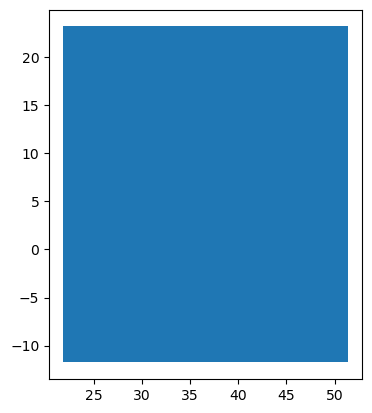

In [26]:
import geopandas as gp
from shapely.geometry import box
import pandas as pd


db=gp.read_file('/home/ea_ghcf_icpac.shp')
xmin,ymin,xmax,ymax =  db.total_bounds

geom =box(*db.total_bounds)

db=pd.DataFrame()
db['geometry']=[geom]

db1=gp.GeoDataFrame(db)

db1.to_file('/home/ea_extent_boundary.shp')
db1.plot()

## subsetting water mask data

In [27]:
#import fiona
import rasterio
from rasterio.mask import mask
import geopandas as gp

nReserve = gpd.read_file('/home/ea_extent_boundary.shp')

#nReserve_proj = nReserve.to_crs({'init': 'epsg:32633'})


#with fiona.open('/home/ea_extent_boundary.shp', "r") as shapefile:
#    shapes = [feature["geometry"] for feature in shapefile]

with rasterio.open("/home/landWater2020.tif") as src:
    out_image, transformed = mask(src, nReserve.geometry, crop=True)
    out_profile = src.profile.copy()

out_profile.update({'width': out_image.shape[2],'height': out_image.shape[1], 'transform': transformed})
with rasterio.open("/home/ea_landwater2020.tif", 'w', **out_profile) as dst:
    dst.write(out_image)

MemoryError: Unable to allocate 138. GiB for an array with shape (418691, 354922) and data type uint8

In [24]:
import rasterio as rio
import geopandas as gpd
from rasterio.mask import mask
import rasterio
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

nReserve = gpd.read_file('/home/ea_extent_boundary.shp')

#nReserve_proj = nReserve.to_crs({'init': 'epsg:4326'})




# with rasterio.open(filepath) as src:
#     rst = src.read(1, window=from_bounds(xmin,ymin,xmax,ymax, src.transform))


with rio.open("/home/landWater2020.tif") as src:
    out_image, out_transform = mask(src, nReserve.geometry,crop=True, filled=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rio.open("/home/ea_landwater2020.tif", "w", **out_meta) as dest:
    dest.write(out_image)
    
# image=out_image.astype(rasterio.uint8)
    
# with rasterio.open(
#         '/home/landWater2020.tif', 'w',
#         driver='GTiff', width=out_image.shape[2], height=out_image.shape[1], count=1,
#         dtype=image.dtype) as dst:
#     dst.write(image, window=from_bounds(xmin,ymin,xmax,ymax, src.transform), indexes=1)

MemoryError: Unable to allocate 138. GiB for an array with shape (418691, 354922) and data type uint8

In [13]:
out_meta

NameError: name 'out_meta' is not defined